In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
full = pd.read_csv('normalised_growth.csv', index_col=0, header=[0] ,parse_dates=True)
full.head()

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,...,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA,PMI
1914-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.635906,NaN,NaN,NaN
1914-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.543396,NaN,NaN,NaN
1914-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.638258,NaN,NaN,NaN
1914-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.638258,NaN,NaN,NaN
1914-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.640650,NaN,NaN,NaN


In [3]:
sliced = full.loc["1948-01-01":"2019-01-01"]
sliced.shape

(853, 32)

In [4]:
core_series = ["CPIAUCSL", "A191RO1Q156NBEA", "UNRATE"]

core = sliced[core_series]

train = core.loc["1948-01-01":"2006-4-01"]
test = core.loc["2006-05-01":]

cpi = train[core_series[0]]
gdp = train[core_series[1]]
ue = train[core_series[2]]

cpi_test = test[core_series[0]]
gdp_test = test[core_series[1]]
ue_test = test[core_series[2]]

print(train.shape)

(700, 3)


In [5]:
from utils import kernel_ridge_ar, get_lags

In [6]:
lags = 3

Feature variable: 
CPIAUCSL
Dimensions of lagged X: 
(697, 9)
Fitting regression...


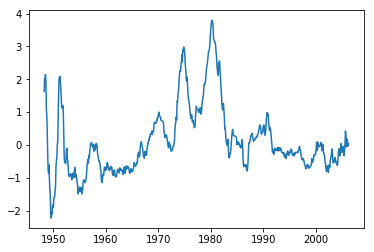

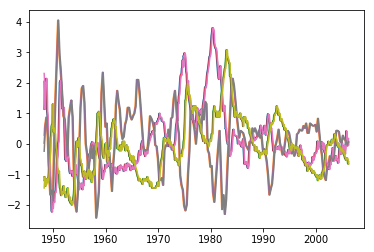

R squared:
0.9855851970243731


In [7]:
cpi_reg = kernel_ridge_ar(cpi, train, lags=lags, kernel='polynomial')

In [8]:
from sklearn.metrics import mean_squared_error

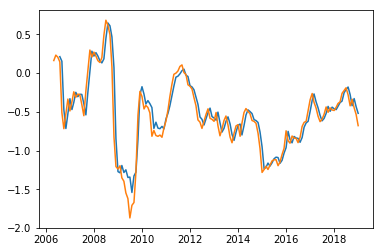

0.02783657454029137


In [9]:
# performance on test set:

cpi_pred = pd.Series(cpi_reg.predict(get_lags(test, lags=lags)[lags:]),
                      index = test.index[lags:])

plt.plot(cpi_pred)
plt.plot(cpi_test)
plt.show()

cpi_mse = mean_squared_error(cpi_pred, cpi_test[lags:])
print(cpi_mse)

Feature variable: 
A191RO1Q156NBEA
Dimensions of lagged X: 
(697, 9)
Fitting regression...


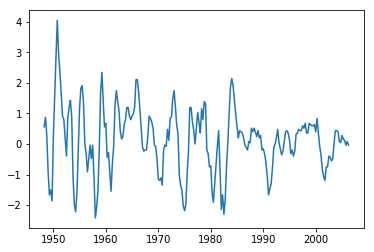

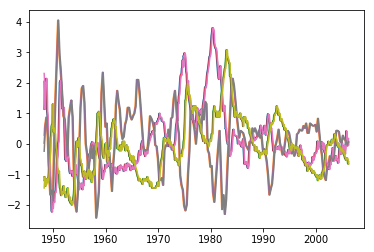

R squared:
0.9872417473278153


In [10]:
gdp_reg = kernel_ridge_ar(gdp, train, lags=lags, kernel='polynomial')

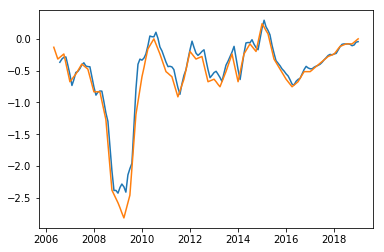

0.022815488873660902


In [11]:
gdp_pred = pd.Series(gdp_reg.predict(get_lags(test, lags=lags)[lags:]),
                      index = test.index[lags:])

plt.plot(gdp_pred)
plt.plot(gdp_test)
plt.show()

gdp_mse = mean_squared_error(gdp_pred, gdp_test[lags:])
print(gdp_mse)

Feature variable: 
UNRATE
Dimensions of lagged X: 
(697, 9)
Fitting regression...


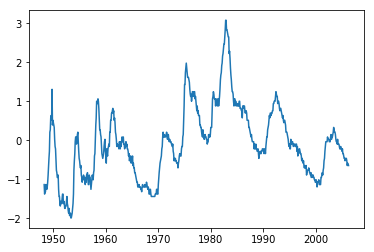

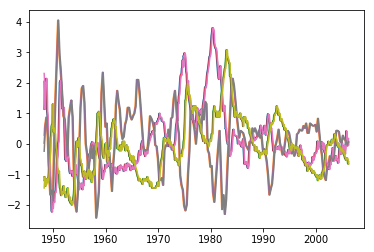

R squared:
0.9881316002017548


In [12]:
ue_reg = kernel_ridge_ar(ue, train, lags=lags, kernel='polynomial')

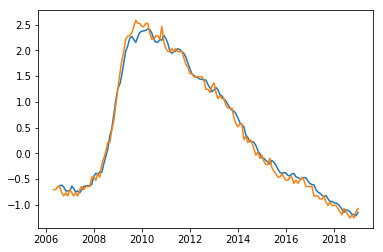

0.013629837851862595


In [13]:
ue_pred = pd.Series(ue_reg.predict(get_lags(test, lags=lags)[lags:]),
                      index = test.index[lags:])

plt.plot(ue_pred)
plt.plot(ue_test)
plt.show()

ue_mse = mean_squared_error(ue_pred, ue_test[lags:])
print(ue_mse)

In [14]:
total_mse = gdp_mse + cpi_mse + ue_mse
print("Average MSE on test: " + str(total_mse))

Average MSE on test: 0.06428190126581487
